In [1]:
!nvidia-smi

Fri Feb 12 11:34:57 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.39       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Installation

ESPnet depends on Kaldi ASR toolkit and Warp-CTC. This will take a few minutes.

In [2]:
# OS setup
!sudo apt-get install bc tree python3-pip
!cat /etc/os-release

# espnet setup
!git clone https://github.com/espnet/espnet
!cd espnet; python -m pip install -e .
!mkdir -p espnet/tools/venv/bin; touch espnet/tools/venv/bin/activate

# warp ctc setup
!git clone https://github.com/espnet/warp-ctc -b pytorch-1.1
!cd warp-ctc && mkdir build && cd build && cmake .. && make -j4
!cd warp-ctc/pytorch_binding && python setup.py install 

# kaldi setup
!cd ./espnet/tools; git clone https://github.com/kaldi-asr/kaldi
!echo "" > ./espnet/tools/kaldi/tools/extras/check_dependencies.sh # ignore check
!chmod +x ./espnet/tools/kaldi/tools/extras/check_dependencies.sh
!cd ./espnet/tools/kaldi/tools; make sph2pipe sclite
!rm -rf espnet/tools/kaldi/tools/python
!wget https://github.com/espnet/kaldi-bin/releases/download/v0.0.1/ubuntu16-featbin.tar.gz
!tar -xf ./ubuntu16-featbin.tar.gz # take a few minutes
!cp featbin/* espnet/tools/kaldi/src/featbin/

# make dummy activate
!mkdir -p espnet/tools/venv/bin
!touch espnet/tools/venv/bin/activate


# my edit
!cd /content/espnet/tools; ./setup_python.sh $(which python3); cd /content/
!source /content/espnet/tools/venv/bin/activate
!/content/espnet/tools/installers/install_sph2pipe.sh
!cp /content/sph2pipe_v2.5/sph2pipe /usr/local/bin
!apt install python3-pip
!python -m pip install chainer==6.0.0

%cd /content/espnet
!python -m pip install -e .
!mkdir -p espnet/tools/venv/bin; touch espnet/tools/venv/bin/activate

%cd /content/espnet/tools/
!rm -f activate_python.sh && touch activate_python.sh

!ls
!make -j4

! /content/espnet/tools/installers/install_warp-ctc.sh

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.6/dist-packages/torch/include/c10/util/Optional.h: In instantiation of ‘constexpr T&& c10::optional<T>::value() const && [with T = bool]’:
/usr/local/lib/python3.6/dist-packages/torch/include/ATen/core/op_registration/hacky_wrapper_for_legacy_signatures.h:19:5:   required from here
/usr/local/lib/python3.6/dist-packages/torch/include/c10/util/Optional.h:496:37: error: binding reference of type ‘bool&&’ to ‘std::remove_reference<const bool&>::type {aka const bool}’ discards qualifiers
     return std::move(contained_val());
                                     ^
/usr/local/lib/python3.6/dist-packages/torch/include/c10/util/Optional.h:497:3: error: body of constexpr function ‘constexpr T&& c10::optional<T>::value() const && [with T = bool]’ not a return-statement
   }
   ^
/usr/local/lib/python3.6/dist-packages/torch/include/c10/util/Optional.h: In instantiation of ‘constexpr T&& c10::optional<T>::operator*() const

In [3]:
%cd /content/espnet/egs/an4/asr1/
!chmod +x path.sh
!chmod +x cmd.sh
!./path.sh
!./cmd.sh

/content/espnet/egs/an4/asr1


In [ ]:
#!source /content/espnet/tools/venv/bin/activate

In [ ]:
#!apt install python3-pip

#!pip

#%cd /content/espnet
#!pip install -e .

Reading package lists... Done
Building dependency tree       
Reading state information... Done
python3-pip is already the newest version (9.0.1-2.3~ubuntu1.18.04.4).
0 upgraded, 0 newly installed, 0 to remove and 17 not upgraded.


## ESPnet command line usage (espnet/egs/xxx)

You can use the end-to-end script `run.sh` for reproducing systems reported in `espnet/egs/*/asr1/RESULTS.md`. Typically, we organize `run.sh` with several stages:

0. Data download (if available)
1. Kaldi-style data preparation 
2. Save python-friendly data (e.g., JSON, HDF5, etc)
3. Lanuage model training
4. ASR model training
5. Decoding and evaluation


In [ ]:
!ls /content/espnet/egs

aidatatang_200zh	 hub4_spanish	must_c
aishell			 iwslt16	polyphone_swiss_french
aishell2		 iwslt18	puebla_nahuatl
ami			 iwslt19	README.md
an4			 iwslt21	reverb
arctic			 jesc		ru_open_stt
aurora4			 jnas		swbd
babel			 jsalt18e2e	tedlium2
blizzard17		 jsut		tedlium3
chime4			 jvs		timit
chime5			 ksponspeech	timit_ssc
chime6			 li10		tweb
cmu_wilderness		 li42		vais1000
commonvoice		 libri_css	vcc20
csj			 librispeech	vivos
csmsc			 libri_trans	voxforge
dipco			 libritts	wsj
dirha_wsj		 ljspeech	wsj_mix
fisher_callhome_spanish  m_ailabs	yesno
fisher_swbd		 mboshi_french	yoloxochitl_mixtec
hkust			 mgb2
how2			 mini_an4



### Stage 0 - 2 Data preparation

For example, if you add `--stop-stage 2`, you can stop the script before neural network training.

In [4]:
!cd /content/espnet/egs/an4/asr1; ./run.sh  --ngpu 1 --stop-stage 2

stage -1: Data Download
local/download_and_untar.sh: downloading data (64 MB) from http://www.speech.cs.cmu.edu/databases/an4//an4_sphere.tar.gz.
--2021-02-12 11:52:21--  http://www.speech.cs.cmu.edu/databases/an4//an4_sphere.tar.gz
Resolving www.speech.cs.cmu.edu (www.speech.cs.cmu.edu)... 128.2.204.214
Connecting to www.speech.cs.cmu.edu (www.speech.cs.cmu.edu)|128.2.204.214|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64327561 (61M) [application/x-gzip]
Saving to: 'an4_sphere.tar.gz'

an4_sphere.tar.gz   100%[===================>]  61.35M  53.1MB/s    in 1.2s    

2021-02-12 11:52:22 (53.1 MB/s) - 'an4_sphere.tar.gz' saved [64327561/64327561]

local/download_and_untar.sh: line 57: cd: ./downloads: No such file or directory
an4/
an4/README
an4/etc/
an4/etc/an4_test.fileids
an4/etc/an4.ug.lm
an4/etc/an4.ug.lm.DMP
an4/etc/an4_train.fileids
an4/etc/an4_train.transcription
an4/etc/an4_test.transcription
an4/etc/an4.dic
an4/etc/an4.phone
an4/etc/an4.filler
an4/

## Kaldi-style directory structure

Always we organize each recipe placed in `egs/xxx/asr1` in Kaldi way:

- `conf/`: kaldi configurations, e.g., speech feature
- `data/`: almost raw [data prepared by Kaldi](https://kaldi-asr.org/doc/data_prep.html)
- `exp/`: intermidiate files through experiments, e.g., log files, model parameters
- `fbank/`: speech feature binary files, e.g., [ark, scp](https://kaldi-asr.org/doc/io.html)
- `dump/`: ESPnet meta data for tranining, e.g., json, hdf5
- `local/`: corpus specific data preparation scripts
- [steps/](https://github.com/kaldi-asr/kaldi/tree/master/egs/wsj/s5/steps), [utils/](https://github.com/kaldi-asr/kaldi/tree/master/egs/wsj/s5/utils): Kaldi's helper scripts

In [ ]:
!tree -L 1 /content/espnet/egs/an4/asr1

/content/espnet/egs/an4/asr1
├── cmd.sh
├── conf
├── data
├── downloads
├── dump
├── exp
├── fbank
├── local
├── path.sh
├── RESULTS
├── run.sh
├── steps -> ../../../tools/kaldi/egs/wsj/s5/steps
└── utils -> ../../../tools/kaldi/egs/wsj/s5/utils

9 directories, 4 files


### TIPS: essential files in data preparation

To create a new recipe, all you need is stage 1 that creates key-value pair files: 
- speech`data/xxx/wav.scp`
- text`data/xxx/text`

#### raw speech file list

In [ ]:
!head /content/espnet/egs/an4/asr1/data/train/wav.scp

fash-an251-b sph2pipe -f wav -p -c 1 ./downloads/an4/wav/an4_clstk/fash/an251-fash-b.sph |
fash-an253-b sph2pipe -f wav -p -c 1 ./downloads/an4/wav/an4_clstk/fash/an253-fash-b.sph |
fash-an254-b sph2pipe -f wav -p -c 1 ./downloads/an4/wav/an4_clstk/fash/an254-fash-b.sph |
fash-an255-b sph2pipe -f wav -p -c 1 ./downloads/an4/wav/an4_clstk/fash/an255-fash-b.sph |
fash-cen1-b sph2pipe -f wav -p -c 1 ./downloads/an4/wav/an4_clstk/fash/cen1-fash-b.sph |
fash-cen2-b sph2pipe -f wav -p -c 1 ./downloads/an4/wav/an4_clstk/fash/cen2-fash-b.sph |
fash-cen4-b sph2pipe -f wav -p -c 1 ./downloads/an4/wav/an4_clstk/fash/cen4-fash-b.sph |
fash-cen5-b sph2pipe -f wav -p -c 1 ./downloads/an4/wav/an4_clstk/fash/cen5-fash-b.sph |
fash-cen7-b sph2pipe -f wav -p -c 1 ./downloads/an4/wav/an4_clstk/fash/cen7-fash-b.sph |
fbbh-an86-b sph2pipe -f wav -p -c 1 ./downloads/an4/wav/an4_clstk/fbbh/an86-fbbh-b.sph |


### raw text list

In [ ]:
!head /content/espnet/egs/an4/asr1/data/train/text

fash-an251-b YES
fash-an253-b GO
fash-an254-b YES
fash-an255-b U M N Y H SIX
fash-cen1-b H I N I C H
fash-cen2-b A M Y
fash-cen4-b M O R E W O O D
fash-cen5-b P I T T S B U R G H
fash-cen7-b TWO SIX EIGHT FOUR FOUR ONE EIGHT
fbbh-an86-b C Z D Z W EIGHT


### TIPS: explore datasets with data.json

To explore datasets easily, ESPnet stores metadata `dump/xxx/data.json` in the stage 2.

('fcaw-cen6-b',
 {'input': [{'feat': '/content/espnet/egs/an4/asr1/dump/test/deltafalse/feats.1.ark:271757',
    'name': 'input1',
    'shape': [288, 83]}],
  'output': [{'name': 'target1',
    'shape': [22, 30],
    'text': 'ONE FIVE TWO THREE SIX',
    'token': 'O N E <space> F I V E <space> T W O <space> T H R E E <space> S I X',
    'tokenid': '17 16 7 2 8 11 24 7 2 22 25 17 2 22 10 20 7 7 2 21 11 26'}],
  'utt2spk': 'fcaw'})

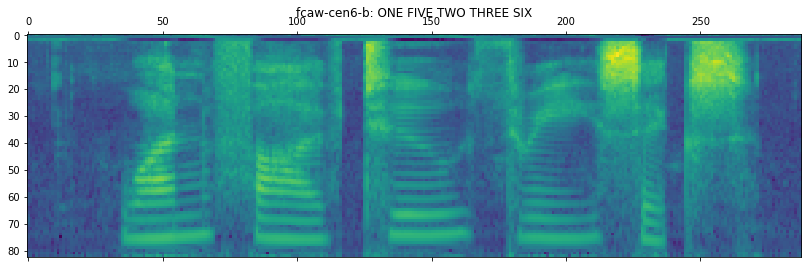

In [5]:
import json
import matplotlib.pyplot as plt
import kaldiio

# load 10-th speech/text in data.json
root = "/content/espnet/egs/an4/asr1"
with open(root + "/dump/test/deltafalse/data.json", "r") as f:
  test_json = json.load(f)["utts"]
  
key, info = list(test_json.items())[10]

# plot the speech feature
fbank = kaldiio.load_mat(info["input"][0]["feat"])
plt.matshow(fbank.T[::-1])
plt.title(key + ": " + info["output"][0]["text"])

# print the key-value pair
key, info

### Stage 3 - 4 NN Training

Let's go to the most interesting part...

In [ ]:
!tail /content/espnet/egs/an4/asr1/conf/train_mtlalpha1.0.yaml

dlayers: 1
dunits: 300
# attention related
atype: location
adim: 320
aconv-chans: 10
aconv-filts: 100

# hybrid CTC/attention
mtlalpha: 1.0


In [ ]:
#!apt install python3-pip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
python3-pip is already the newest version (9.0.1-2.3~ubuntu1.18.04.4).
0 upgraded, 0 newly installed, 0 to remove and 17 not upgraded.


In [ ]:
#!python -m pip install chainer==6.0.0

In [6]:
%cd /content/espnet/egs/an4/asr1 
!./run.sh  --ngpu 1 --stage 3 --stop-stage 4 --train-config ./conf/train_mtlalpha1.0.yaml

/content/espnet/egs/an4/asr1
dictionary: data/lang_1char/train_nodev_units.txt
stage 3: LM Preparation
stage 4: Network Training


In [ ]:
%cd /content/espnet/tools/

/content/espnet/tools


In [ ]:
!ls 

activate_python.sh		     sctk-2.4.10
chainer.done			     sctk-2.4.10-20151007-1312Z.tar.bz2
check_install.py		     sctk.done
check_pytorch_cuda_compatibility.py  setup_anaconda.sh
conda_packages.done		     setup_cuda_env.sh
espnet.done			     setup_python.sh
extra_path.sh			     setup_venv.sh
installers			     sph2pipe.done
kaldi				     sph2pipe_v2.5
Makefile			     sph2pipe_v2.5.tar.gz
pytorch.done			     venv
sctk


In [ ]:
#! /content/espnet/tools/installers/install_warp-ctc.sh

cuda_version=101
    100% |████████████████████████████████| 3.1MB 465kB/s 


In [ ]:
!cat exp/train_nodev_pytorch_train_mtlalpha1.0/train.log

# asr_train.py --config ./conf/train_mtlalpha1.0.yaml --ngpu 1 --backend pytorch --outdir exp/train_nodev_pytorch_train_mtlalpha1.0/results --tensorboard-dir tensorboard/train_nodev_pytorch_train_mtlalpha1.0 --debugmode 1 --dict data/lang_1char/train_nodev_units.txt --debugdir exp/train_nodev_pytorch_train_mtlalpha1.0 --minibatches 0 --verbose 1 --resume --train-json dump/train_nodev/deltafalse/data.json --valid-json dump/train_dev/deltafalse/data.json 
# Started at Fri Feb 12 07:51:33 UTC 2021
#
2021-02-12 07:51:35,555 (asr_train:592) INFO: ngpu: 1
2021-02-12 07:51:35,555 (asr_train:595) INFO: python path = /env/python
2021-02-12 07:51:35,555 (asr_train:598) INFO: random seed = 1
2021-02-12 07:51:35,555 (asr_train:617) INFO: backend = pytorch
2021-02-12 07:51:35,760 (deterministic_utils:26) INFO: torch type check is disabled
2021-02-12 07:51:35,791 (asr:410) INFO: stream1: input dims : 83
2021-02-12 07:51:35,791 (asr:411) INFO: #output dims: 30
2021-02-12 07:51:35,791 (asr:425) INFO: 

### TIPS: change_yaml.py

You can tweak YAML config by **$(change_yaml.py xxx.yaml -a yyy=zzz)**

In [ ]:
!cd espnet/egs/an4/asr1; source path.sh; \
  ./run.sh  --ngpu 1 --stage 4 --stop-stage 4 \
  --train-config $(change_yaml.py ./conf/train_mtlalpha1.0.yaml -a eunits=100)

/bin/bash: line 0: cd: espnet/egs/an4/asr1: No such file or directory
dictionary: data/lang_1char/train_nodev_units.txt
stage 4: Network Training
run.pl: job failed, log is in exp/train_nodev_pytorch_train_mtlalpha1.0_eunits100/train.log


### TIPS: tensorboard

You can easily monitor effects of the config by tensorboard

### Decoding and evaluation

decode config (`change_yaml.py` also works)

In [ ]:
!cat espnet/egs/an4/asr1/conf/decode_ctcweight1.0.yaml

# decoding parameter
beam-size: 20
penalty: 0.0
maxlenratio: 0.0
minlenratio: 0.0
ctc-weight: 1.0
lm-weight: 1.0


#### Command line usage

In [7]:
!cd espnet/egs/an4/asr1; ./run.sh  --stage 5

/bin/bash: line 0: cd: espnet/egs/an4/asr1: No such file or directory
dictionary: data/lang_1char/train_nodev_units.txt
stage 5: Decoding
2021-02-12 11:59:03,831 (splitjson:40) INFO: /usr/bin/python3 /content/espnet/egs/an4/asr1/../../../utils/splitjson.py --parts 8 dump/train_dev/deltafalse/data.json
2021-02-12 11:59:03,831 (splitjson:40) INFO: /usr/bin/python3 /content/espnet/egs/an4/asr1/../../../utils/splitjson.py --parts 8 dump/test/deltafalse/data.json
2021-02-12 11:59:03,832 (splitjson:52) INFO: number of utterances = 100
2021-02-12 11:59:03,833 (splitjson:52) INFO: number of utterances = 130
2021-02-12 12:03:56,337 (concatjson:34) INFO: /usr/bin/python3 /content/espnet/egs/an4/asr1/../../../utils/concatjson.py exp/train_nodev_pytorch_train_mtlalpha1.0/decode_train_dev_decode_ctcweight1.0_lm_word100/data.1.json exp/train_nodev_pytorch_train_mtlalpha1.0/decode_train_dev_decode_ctcweight1.0_lm_word100/data.2.json exp/train_nodev_pytorch_train_mtlalpha1.0/decode_train_dev_decode_ct

#### ASR result as `data.json`

In [16]:
!head -n20 /content/espnet/egs/an4/asr1/exp/train_nodev_pytorch_train_mtlalpha1.0/decode_test_decode_ctcweight1.0_lm_word100/data.json

{
    "utts": {
        "fcaw-an406-b": {
            "output": [
                {
                    "name": "target1[1]",
                    "rec_text": "RUBOUT T N E N THREE NINE<eos>",
                    "rec_token": "R U B O U T <space> T <space> N <space> E <space> N <space> T H R E E <space> N I N E <eos>",
                    "rec_tokenid": "20 23 4 17 23 22 2 22 2 16 2 7 2 16 2 22 10 20 7 7 2 16 11 16 7 29",
                    "score": -37.780120849609375,
                    "shape": [
                        25,
                        30
                    ],
                    "text": "RUBOUT G M E F THREE NINE",
                    "token": "R U B O U T <space> G <space> M <space> E <space> F <space> T H R E E <space> N I N E",
                    "tokenid": "20 23 4 17 23 22 2 9 2 15 2 7 2 8 2 22 10 20 7 7 2 16 11 16 7"
                }
            ],
            "utt2spk": "fcaw"


### Recognize speech from python

Let's use  ESPnet as a library and the trained model:

In [15]:
!ls /content/espnet/egs/an4/asr1/exp/train_nodev_pytorch_train_mtlalpha1.0/results

cer.png		 snapshot.ep.1	 snapshot.ep.15  snapshot.ep.20  snapshot.ep.8
ctc_prob	 snapshot.ep.10  snapshot.ep.16  snapshot.ep.3	 snapshot.ep.9
log		 snapshot.ep.11  snapshot.ep.17  snapshot.ep.4
loss.png	 snapshot.ep.12  snapshot.ep.18  snapshot.ep.5
model.json	 snapshot.ep.13  snapshot.ep.19  snapshot.ep.6
model.loss.best  snapshot.ep.14  snapshot.ep.2	 snapshot.ep.7


#### recap: load speech from data.json

Text(0.5, 1.05, 'fcaw-cen6-b: ONE FIVE TWO THREE SIX')

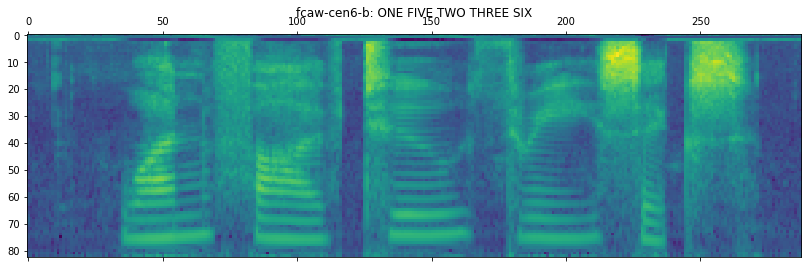

In [13]:
import json
import matplotlib.pyplot as plt
import kaldiio

# load 10-th speech/text in data.json
root = "/content/espnet/egs/an4/asr1"
with open(root + "/dump/test/deltafalse/data.json", "r") as f:
  test_json = json.load(f)["utts"]
  
key, info = list(test_json.items())[10]

# plot the speech feature
fbank = kaldiio.load_mat(info["input"][0]["feat"])
plt.matshow(fbank.T[::-1])
plt.title(key + ": " + info["output"][0]["text"])

#### load model

In [ ]:
!export PYTHONPATH=$PYTHONPATH:

In [ ]:
import os
os.environ['PYTHONPATH'] += ":/content/espnet/espnet/"
print(os.environ['PYTHONPATH'])

import espnet.bin

espnet.bin.asr_recog.get_parser()

/env/python:/content/espnet/espnet/


ModuleNotFoundError: ignored

In [17]:
import json
import torch
import argparse
from espnet.bin.asr_recog import get_parser
from espnet.nets.pytorch_backend.e2e_asr import E2E

root = "espnet/egs/an4/asr1"
model_dir = root + "/exp/train_nodev_pytorch_train_mtlalpha1.0/results"

# load model
with open(model_dir + "/model.json", "r") as f:
  idim, odim, conf = json.load(f)
model = E2E(idim, odim, argparse.Namespace(**conf))
model.load_state_dict(torch.load(model_dir + "/model.loss.best"))
model.cpu().eval()

# load token dict
with open(root + "/data/lang_1char/train_nodev_units.txt", "r") as f:
  token_list = [entry.split()[0] for entry in f]
token_list.insert(0, '<blank>')
token_list.append('<eos>')

# recognize speech
parser = get_parser()
args = parser.parse_args(["--beam-size", "2", "--ctc-weight", "1.0", "--result-label", "out.json", "--model", ""])
result = model.recognize(fbank, args, token_list)
s = "".join(conf["char_list"][y] for y in result[0]["yseq"]).replace("<eos>", "").replace("<space>", " ").replace("<blank>", "")

print("groundtruth:", info["output"][0]["text"])
print("prediction: ", s)

ModuleNotFoundError: ignored

In [ ]:
import os
import kaldiio
from IPython.display import Audio


try:
  d = os.getcwd()
  os.chdir(root)
  sr, wav = kaldiio.load_scp("data/test/wav.scp")[key]
finally:
  os.chdir(d)
Audio(wav, rate=sr)

FileNotFoundError: ignored